Set directory

Deep learning model built using Keras with a TensorFlow


In [5]:
import os


In [6]:
current_directory = os.getcwd()
current_directory

'C:\\Users\\joe62'

In [7]:
os.chdir('C:\\Users\\joe62')

In [8]:
import pandas as pd
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import normalize
import csv

In [9]:
with open ('C:\\Users\joe62\\OneDrive - Aberystwyth University\\Apps\\Desktop\\Research on demographic and health\\deep_learning_n.csv', 'r') as f:
      reader = csv.reader(f)
      deep_learning_n = list(reader)

In [10]:
data = np.array(deep_learning_n, dtype=int)

Description of the data The data is from Demographic and health survey, Nigeria dataset 2018. The dependent varaible (1st coloumn of the dataset) was to determine if a child bearing woman ever had terminated pregnancy, "0" was no as reponse while "1" referrred to "yes" as response, indepedent variables were the weight of the respondent, wealth index, number of household and no of children given birth to by the respondent in column 2 to 5 respectively.

In [11]:
print (data)

[[      0  870296  150234       6       3]
 [      0  870296  150234       6       3]
 [      0  870296  150234       6       3]
 ...
 [      0 1389845   39837       6       4]
 [      0 1389845   39837       6       4]
 [      1 1389845  106615       3       1]]


In [12]:
len(data)

104808

Spliting data into training and test data

In [13]:
data = shuffle (data)
training, test = np.array_split(data, [int(0.8*len(data))])
len(training)

83846

In [14]:
len(test)

20962

Training dataset

Preparing target (dependent variable)

In [15]:
dependent_train_data = training[0:,0]
print(dependent_train_data)

[0 0 0 ... 0 0 0]


Reshape train data

In [16]:
dependent_train_data= training.reshape(-1,1)
print(dependent_train_data)

[[      0]
 [ 968085]
 [-101894]
 ...
 [-125587]
 [      4]
 [     10]]


Preparing target (independent variables)

In [17]:
independent_variabls_train_data = training[:,1:]
print(independent_variabls_train_data)

[[ 968085 -101894       3       1]
 [ 967954 -120590       4       3]
 [ 741120   63854       5       6]
 ...
 [ 756007  -66273       7       9]
 [ 864285  -19406       5      11]
 [ 952089 -125587       4      10]]


Normalization of features (independent variables)

In [18]:
normalized_independent_train_samples = normalize(independent_variabls_train_data, axis=0)

insert libraries and modules

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

Sequential model

In [21]:
model = Sequential([
      
     Dense(units=32, input_shape=(4,), activation = "relu"),
     Dense(units=64, activation ="relu"),
     Dense(units=128, activation ="relu"),
     Dropout(0.2),
     Dense(units=1, activation = "sigmoid")
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,721
Trainable params: 10,721
Non-trainable params: 0
_________________________________________________________________


Use model to predict

Preparing dependent_test_data

In [23]:
dependent_test_data = test[0:,0]
independent_variabls_test_data = test[:,1:]
normalized_independent_test_samples = normalize(independent_variabls_test_data , axis=0)


In [24]:
predictions = model.predict(x=independent_variabls_test_data, batch_size=10, verbose=0 )

In [25]:
print(predictions)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


In [26]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Convert predictions to binary (0 or 1) using a threshold (e.g., 0.5)

In [27]:
binary_predictions = (predictions > 0.5).astype(int)

In [28]:
cm = confusion_matrix(y_true = dependent_test_data, y_pred =binary_predictions )
print(cm)

[[16326  1417]
 [ 3035   184]]


In [29]:
def plot_confusion_matrix(cm, classes, 
                          normalize= False, 
                          title = 'Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm=cm.astype('int')/ cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix' ),
    else:
            print('Confusion matrix, without normalization' )
    print(cm)
    
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment= "center",
                 color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[16326  1417]
 [ 3035   184]]


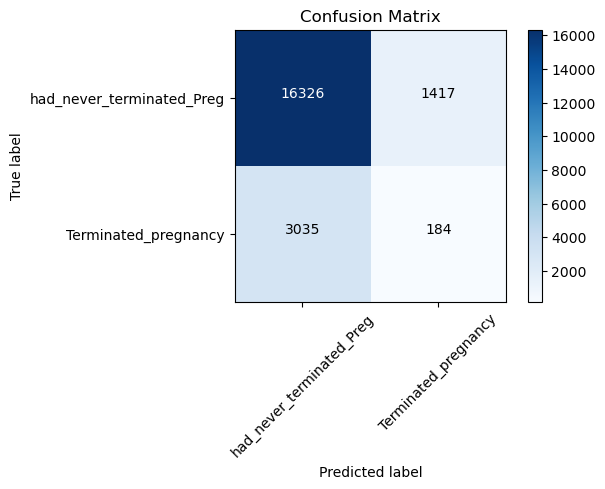

In [30]:
cm_plot_labels = ['had_never_terminated_Preg', 'Terminated_pregnancy'] 
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')

Values from the confusion matrix

In [31]:
TN = 17795  # True Negatives
FP = 16     # False Positives
FN = 3148   # False Negatives
TP = 3      # True Positives

Recall (also known as Sensitivity or True Positive Rate

In [32]:
recall = TP / (TP + FN) *100
print(f"Recall: {recall:.4f}")

Recall: 0.0952


Specificity

In [33]:
specificity = TN / (TN + FP) *100
print(f"Specificity: {specificity:.4f}")

Specificity: 99.9102


Recall calculation

In [34]:
precision = TP / (TP + FP)*100
print(f"Precision: {precision:.4f}")

Precision: 15.7895


 Save the model


In [35]:
if os.path.isfile('C:\\Users\\joe62\Deep learning model built using Keras with a TensorFlow') is False: 
    model.save('Deep learning model built using Keras with a TensorFlow')

INFO:tensorflow:Assets written to: Deep learning model built using Keras with a TensorFlow\assets


In [ ]:
"C:\Users\joe62\Downloads\Deep learning model built using Keras with a TensorFlow.py"